# Bode Plot Tutorial — 3

**Topic:** First-order plant with a $P$ controller — magnitude & phase Bode plots

We focus on how a proportional gain affects the open-loop Bode plot (magnitude & phase). This helps understand bandwidth changes from simple proportional tuning.


## 1. Setup

Plant: same first-order lag

Controller: $P$ controller $C(s) = K_p$ (just a scalar gain). We will plot the open-loop transfer function $L(s) = C(s) G(s) = K_p G(s)$.

In [7]:
# Imports (standalone cell)
import numpy as np
import matplotlib.pyplot as plt
import control as ct
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,4)

In [8]:
# Define plant
K = 2.0
tau = 5.0
G = ct.tf([K], [tau, 1.0])
print("Plant G(s):", G)

Plant G(s): <TransferFunction>: sys[35]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     2
  -------
  5 s + 1


## 2. Effect of proportional gain on Bode magnitude and phase

We will compare open-loop Bode plots for a few $K_p$ values (e.g., 0.5, 1, 2, 5). Note that phase does not change with $K_p$ because multiplying by a positive real scalar affects magnitude only; magnitude shifts by $20*log_{10}(K_p)$.

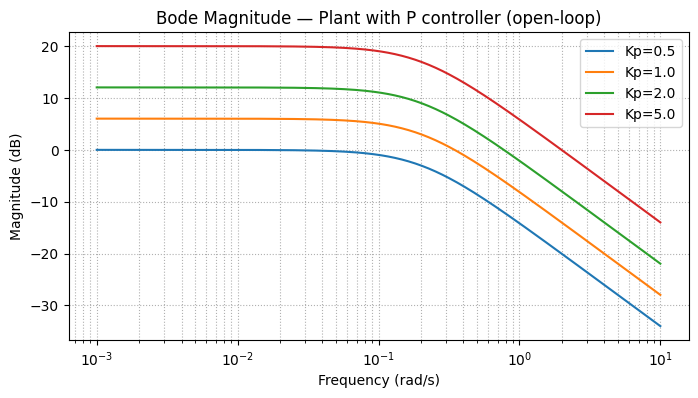

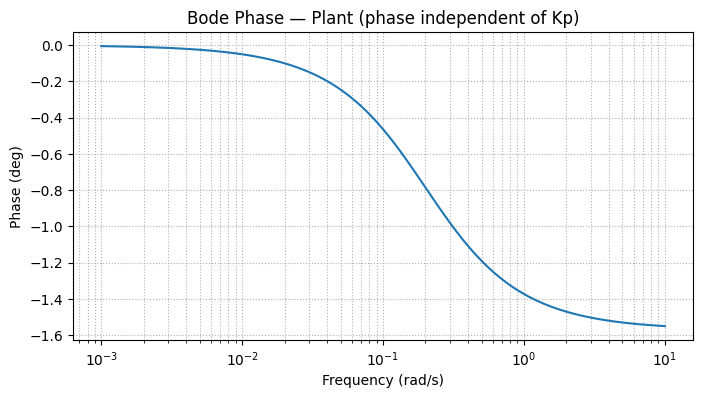

In [9]:
# Gains to compare
Kp_list = [0.5, 1.0, 2.0, 5.0]
w = np.logspace(-3, 1, 500)

plt.figure()
for Kp in Kp_list:
    L = Kp * G
    mag, phase, omega = ct.bode(L, w, dB=True, deg=True, plot=False)
    plt.semilogx(omega, 20*np.log10(mag), label=f"Kp={Kp}")
plt.title('Bode Magnitude — Plant with P controller (open-loop)')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True, which='both', linestyle=':')

# Phase plot (same for all positive Kp values)
plt.figure()
mag0, phase0, omega0 = ct.bode(G, w, dB=True, deg=True, plot=False)
plt.semilogx(omega0, phase0)
plt.title('Bode Phase — Plant (phase independent of Kp)')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase (deg)')
plt.grid(True, which='both', linestyle=':')

## 3. Quick observation

- Increasing $K_p$ shifts the magnitude curve up by $20\log_{10}(K_p)$ dB. The phase remains unchanged for positive gains.
- This is why proportional tuning affects bandwidth and gain crossover frequency.


## Exercise 3 — $P$ controller

**Task:** Pick a $Kp$ value that approximately increases the gain crossover frequency (frequency where magnitude crosses $0$ dB) by a factor of $2$ compared to $Kp=1.0$. Replot the open-loop Bode magnitude and phase and comment (1–2 lines) on whether phase at the new crossover changed.

Fill the blank code cells below.

In [ ]:
# --- Choose a Kp and re-plot open-loop Bode ---
# Hint: try Kp = 2.0 or Kp = 5.0 and compare the gain crossover frequency to Kp=1.0


# Compare and plot two proportional gains

# Phase plot (same for all positive Kp)


In [11]:
# --- Blank cell to write a short comment on what you observe re: crossover freq and phase ---
# Example: print("With higher Kp the crossover frequency increased; phase at crossover is similar since phase is independent of Kp.")
